# Antarctic Cities Data Analysis

## Data Preparation

Imports

In [113]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import savReaderWriter
plt.rcParams["figure.figsize"] = (7,7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SPSS file names.

In [98]:
paSavFileName = "data/pa.sav"
slSavFileName = "data/sl.sav"

Load SPSS data and metadata.

In [99]:
with savReaderWriter.SavHeaderReader(paSavFileName) as header:
     pa_metadata = header.all()
with savReaderWriter.SavReader(paSavFileName) as reader:
     pa_data = pd.DataFrame(list(reader))


Rename columns.

In [100]:
pa_data.columns = [x.decode('utf-8') for x in metadata.varNames]

General metadata functions.

In [266]:
def get_var_label(var, metadata = pa_metadata):
    return metadata.varLabels[bytes(var, encoding='utf-8')].decode('windows-1252')

def get_value_labels(var, metadata = pa_metadata):
    return dict([(k, v.decode('windows-1252')) for k, v in metadata.valueLabels[bytes(var, encoding='windows-1252')].items()])

def freq_table(var, data = pa_data, metadata = pa_metadata):
    return pd.DataFrame(list(get_value_labels(var).items()), columns=['index', get_var_label(var)]) \
            .set_index('index', drop=True) \
            .merge(pd.DataFrame(data[var].value_counts().sort_index()) \
                   .rename(columns = {var: 'Frequency'}), \
                   left_index = True, right_index = True) \
            
def histogram(vars, data = pa_data):
    
    return data[vars].sum(axis = 1)
            
    

## Exploratory data

In [229]:
pa_data.columns

Index(['Folio', 'Location', 'An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 'An_14',
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21', 'An_22',
       'An_23a', 'An_23b', 'An_23c', 'Satis_1', 'Satis_2', 'Satis_3',
       'Satis_4', 'Satis_5', 'Satis_6', 'Satis_7', 'Satis_8', 'Satis_9',
       'Satis_10', 'Satis_11', 'Satis_12', 'Satis_13', 'Satis_14', 'Satis_15',
       'Satis_16', 'Satis_17', 'Satis_18', 'Satis_19', 'Satis_20', 'Satis_21',
       'Satis_22', 'Satis_23', 'Satis_24', 'Satis_25', 'Satis_26', 'Satis_27',
       'Satis_28', 'Satis_29', 'Satis_30', 'Satis_31', 'Satis_32', 'Satis_33',
       'Satis_34', 'Satis_35', 'Satis_36', 'Satis_37', 'Satis_38', 'Satis_39',
       'Satis_40', 'Soc_1', 'Soc_3', 'Soc_2a', 'Soc_2b', 'Soc_4', 'Soc_5',
       'Soc_6', 'Soc_7', 'Soc_8', 'Soc_9a', 'Soc_9b', 'Soc_10'],
      dtype='object')

In [104]:
pa_data.head()

,Folio,Location,An_1,An_2,An_3,An_4,An_5,An_6,An_7,An_8,...,Soc_2a,Soc_2b,Soc_4,Soc_5,Soc_6,Soc_7,Soc_8,Soc_9a,Soc_9b,Soc_10
0,314.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,2.0,2.0,2.0,6.0,4.0,23.0,NaN,1.0
1,317.0,1.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,...,20.0,NaN,2.0,1.0,2.0,6.0,4.0,20.0,NaN,7.0
2,316.0,1.0,4.0,3.0,3.0,4.0,4.0,5.0,3.0,4.0,...,18.0,NaN,2.0,2.0,2.0,6.0,4.0,18.0,NaN,1.0
3,319.0,1.0,4.0,4.0,4.0,4.0,3.0,5.0,2.0,1.0,...,42.0,NaN,2.0,1.0,2.0,4.0,4.0,5.0,NaN,2.0
4,318.0,1.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,4.0,...,23.0,NaN,2.0,2.0,2.0,7.0,4.0,23.0,NaN,1.0


## Graphs

General function for rendering a histogram (follows the Punta Arenas example).

In [255]:

cols = ['An_1', 'An_2', 'An_3', 'An_4']

def gen_histogram(col):
    fig, ax = plt.subplots()
    labels = get_value_labels(col).values()
    bin_length = len(labels)
    n, bins, patches = ax.hist(pa_data[col].dropna(), bins = np.arange(1, bin_length + 2) - 0.5, rwidth = 0.8)
    
    # Add grid
    ax.grid(True)

    
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    # scale values to interval [0,1]
    bns = bin_centers - min(bin_centers)
    bns /= max(bns)
    
    # rescale values to interval [0.2,0.8]
    scale_inc = 0.2
    bns *= (1.0 - scale_inc * 2.)
    bns += scale_inc

    # Apply colours
    cm = plt.get_cmap('Blues')
    for c, patch in zip(bns, patches):
        patch.set_facecolor(cm(c))

    # Add title and axes
    plt.title(get_var_label(col), loc='left')
    ax.set_xticks(np.arange(1, bin_length + 1))
    ax.set_xticklabels(get_value_labels(col).values(), rotation=45, ha='right')
    plt.xlabel('Level')
    plt.ylabel('No. of responses')

    # Tweak spacing to prevent clipping of ylabel
#     fig.tight_layout()
    plt.show()
        


Renders all of the graphs using the histogram function above.

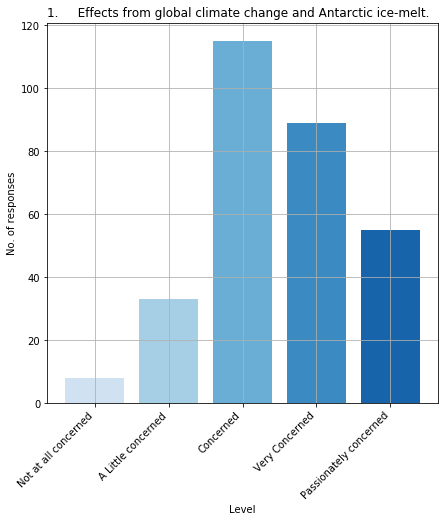

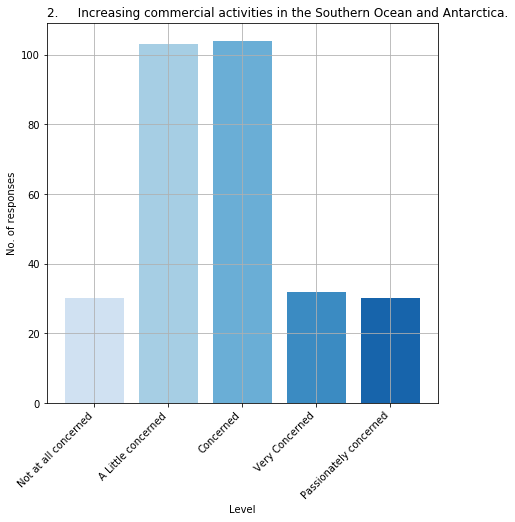

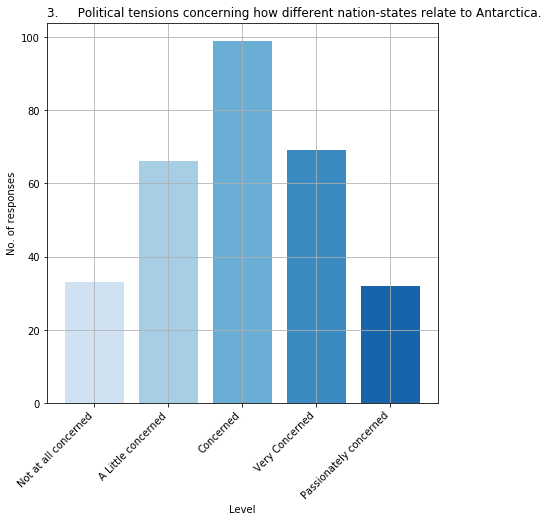

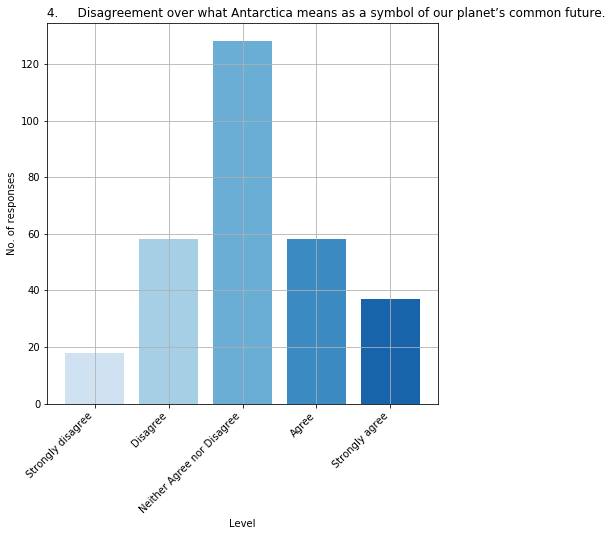

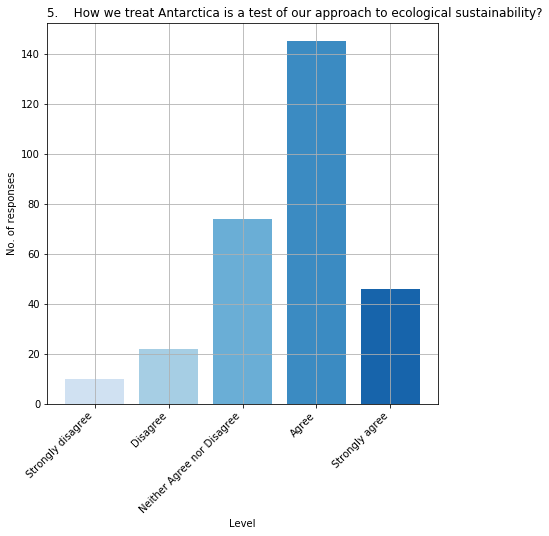

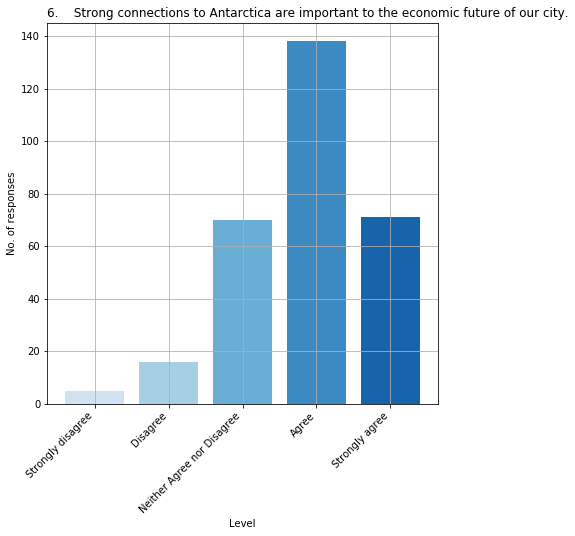

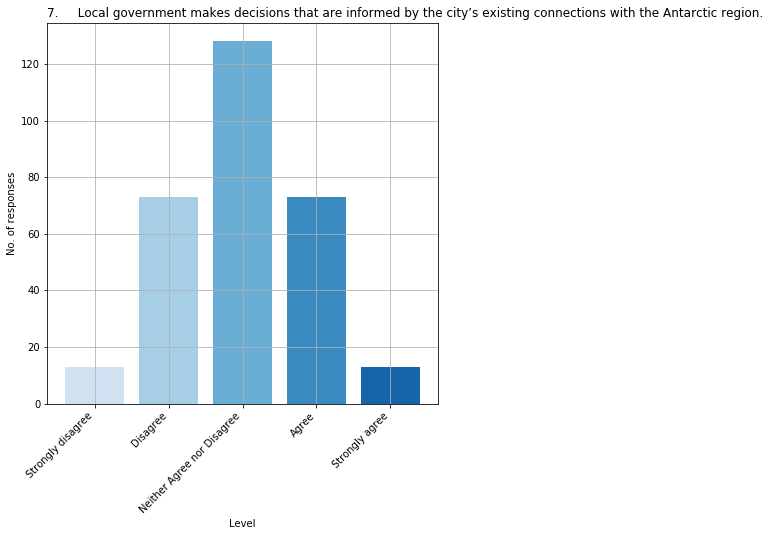

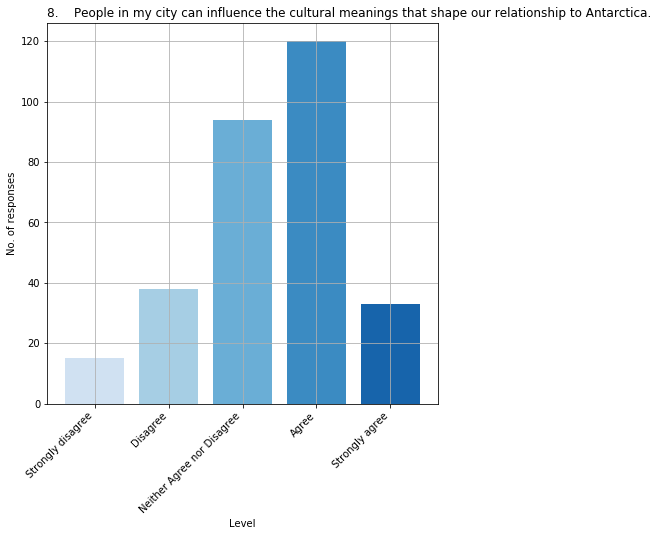

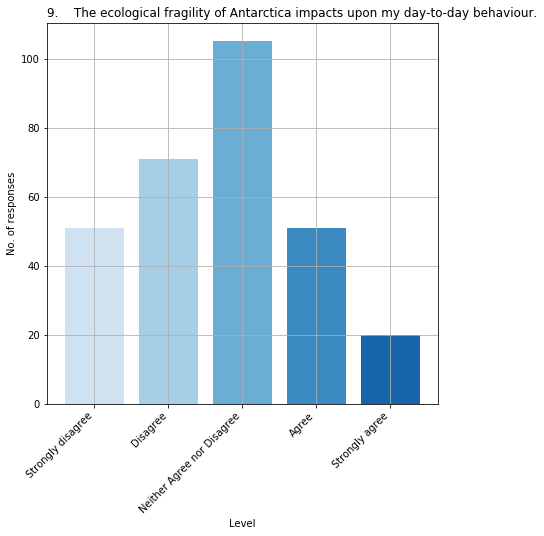

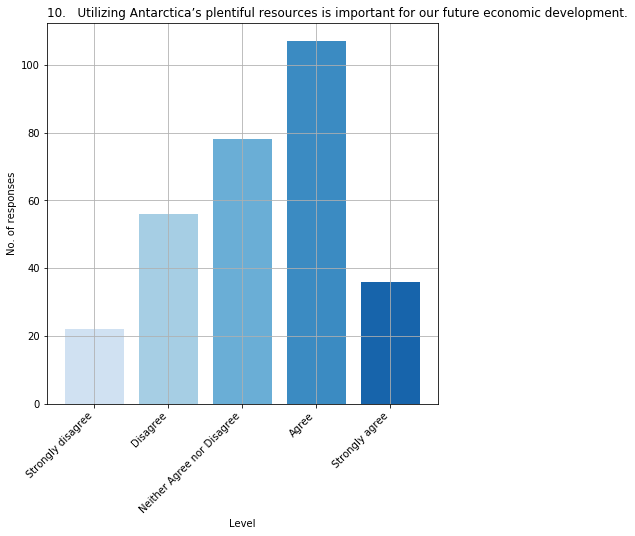

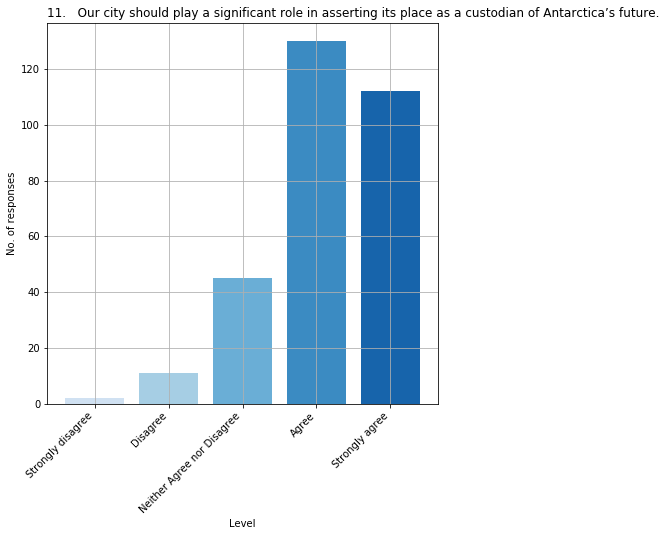

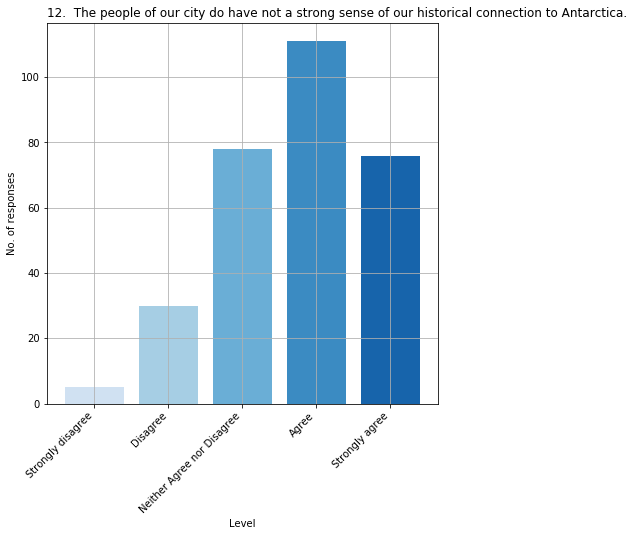

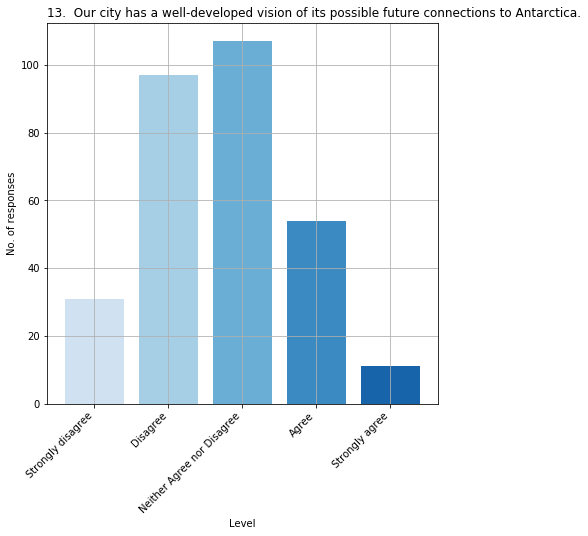

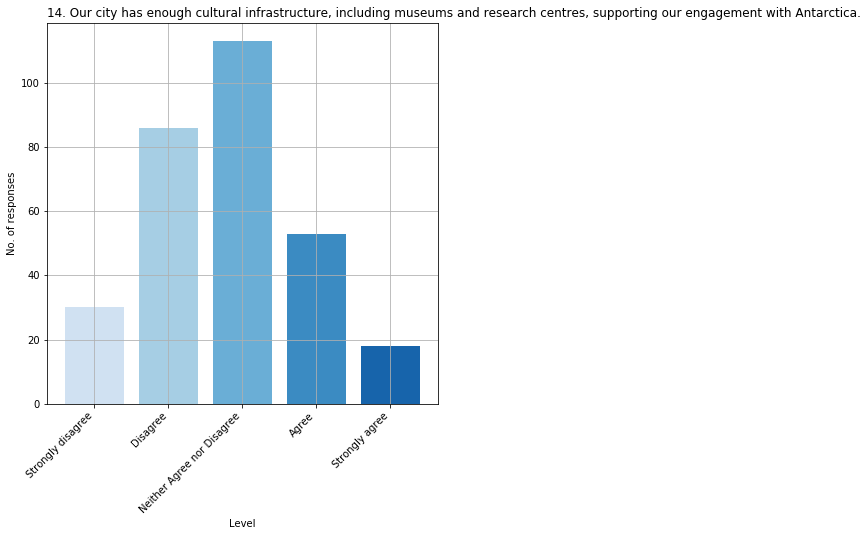

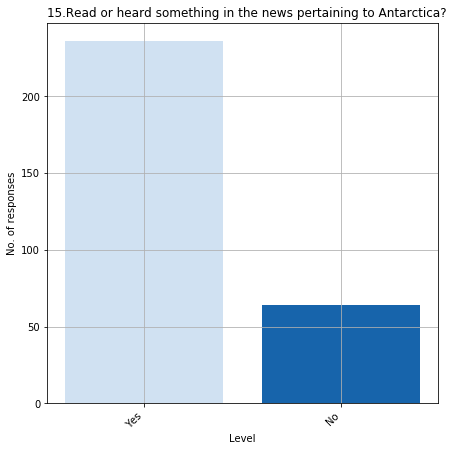

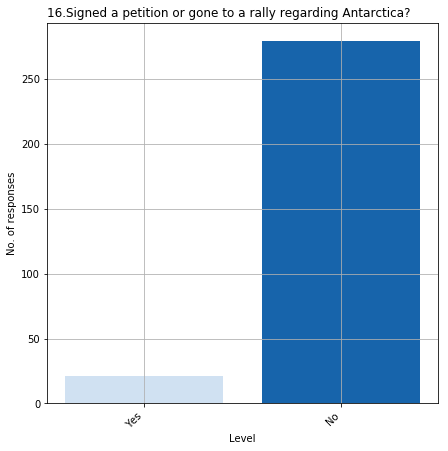

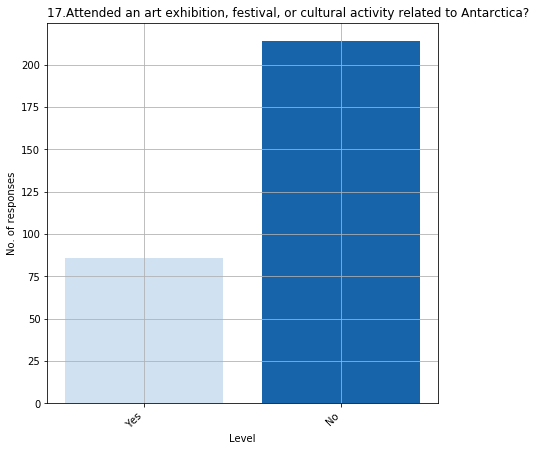

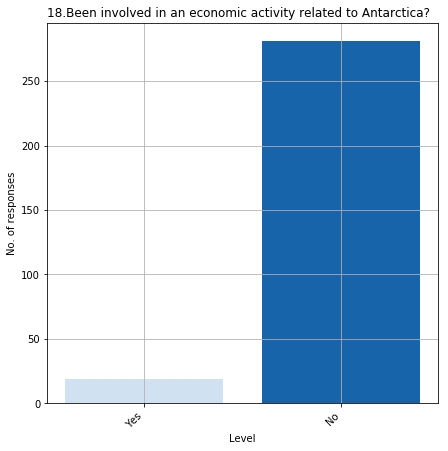

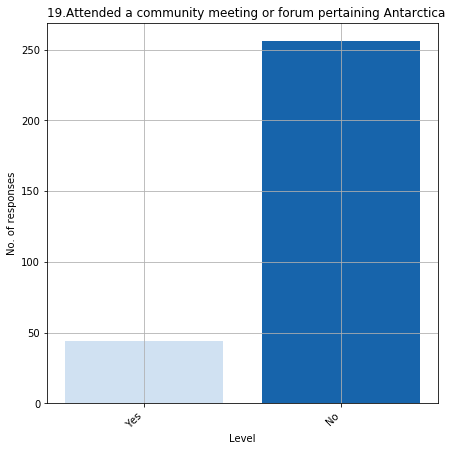

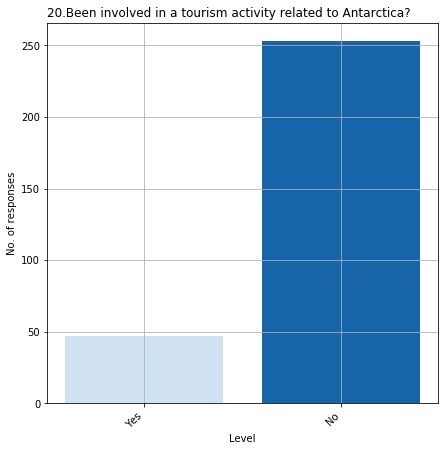

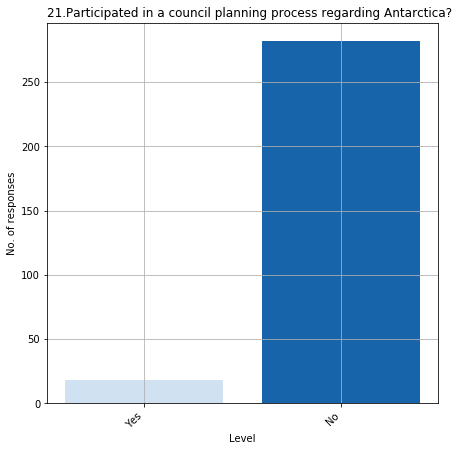

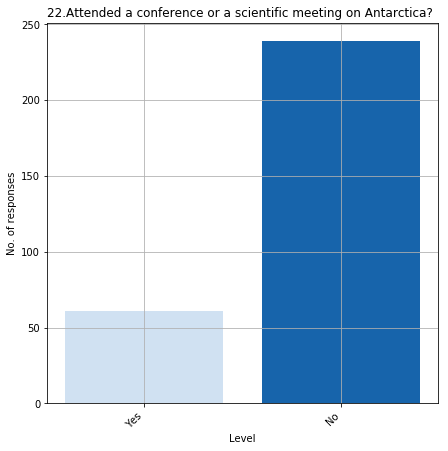

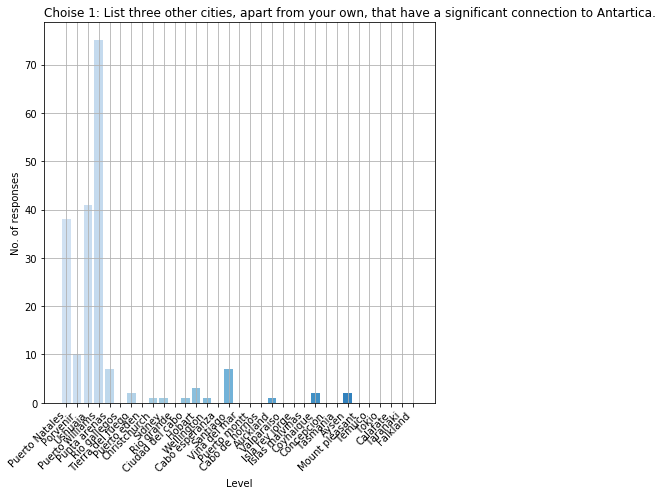

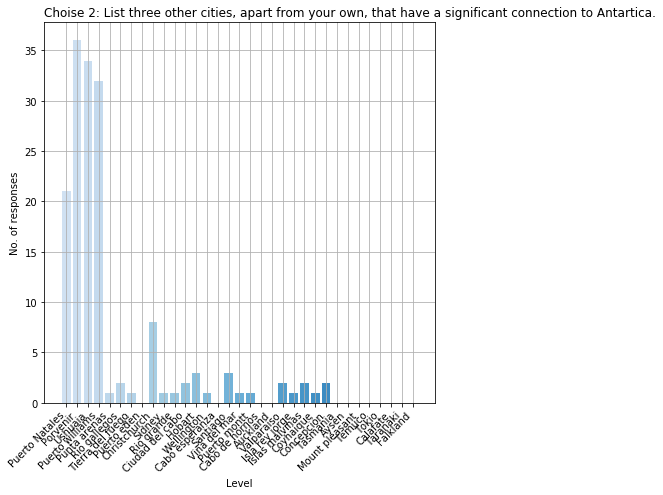

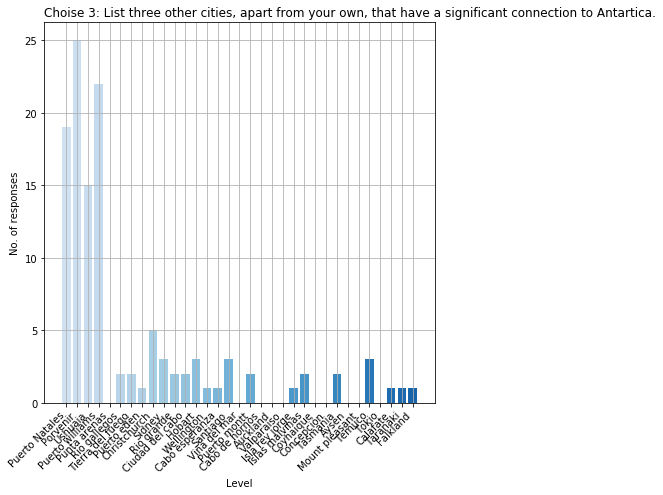

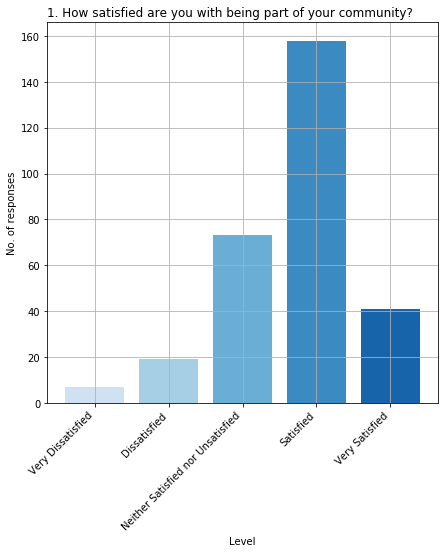

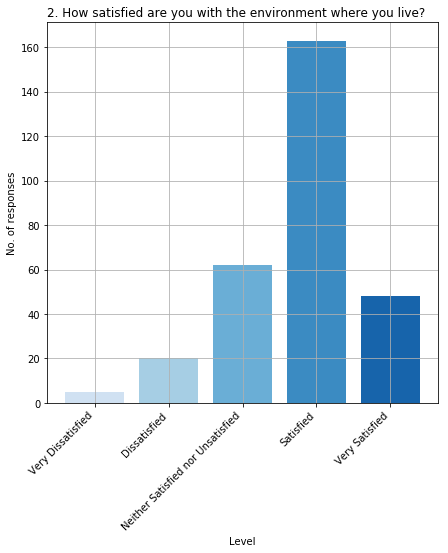

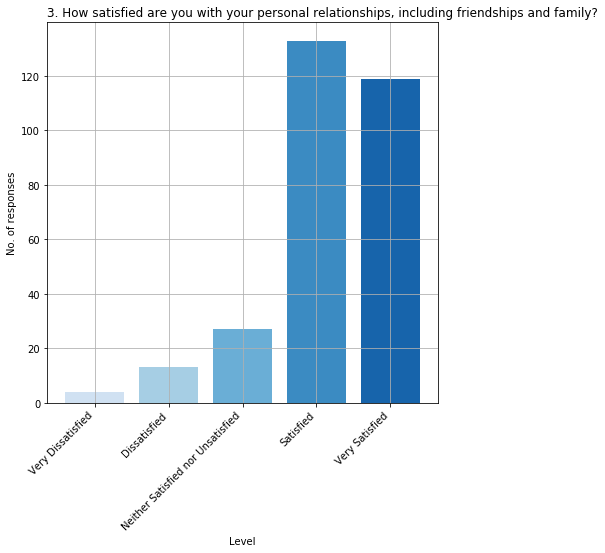

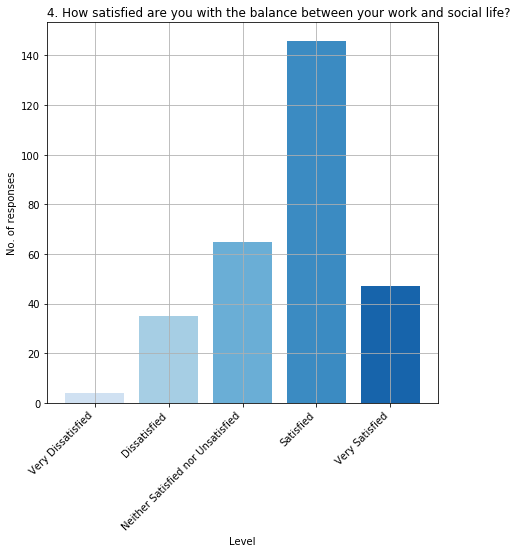

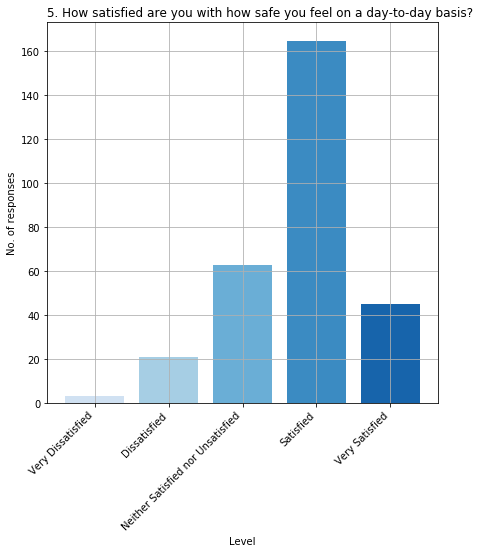

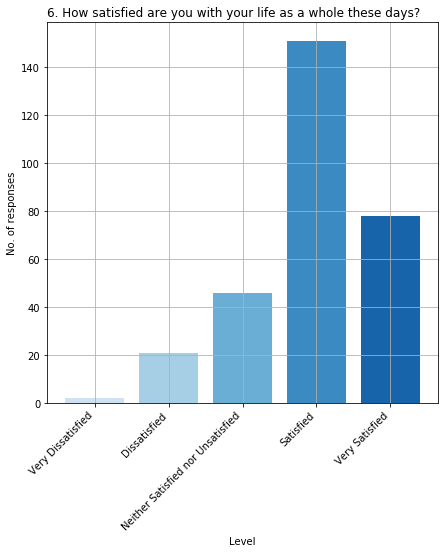

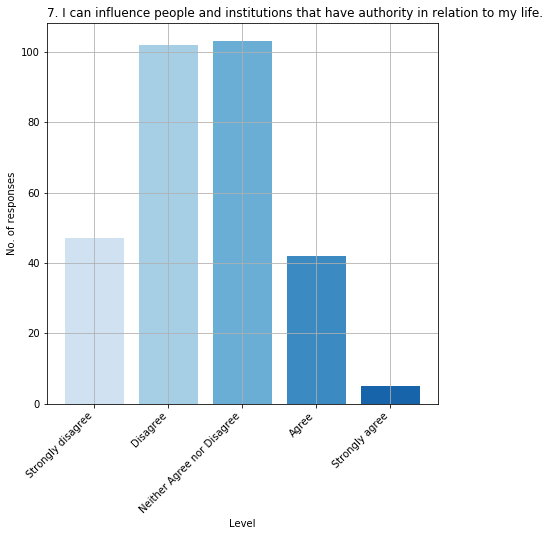

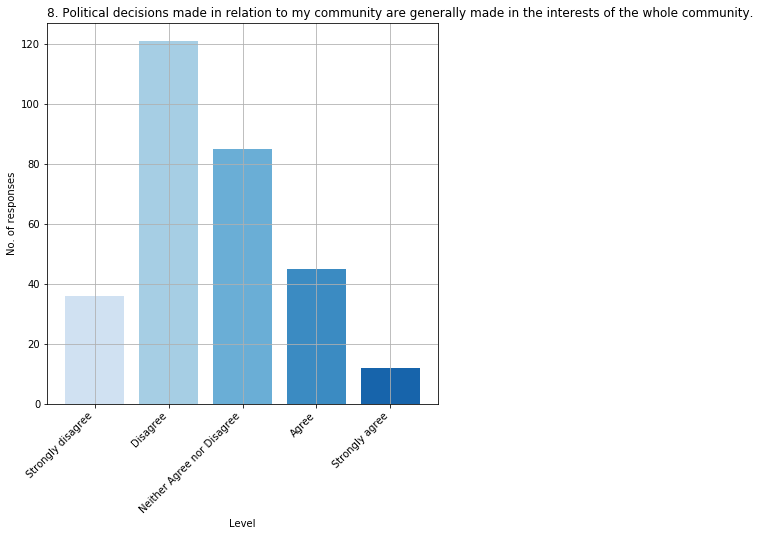

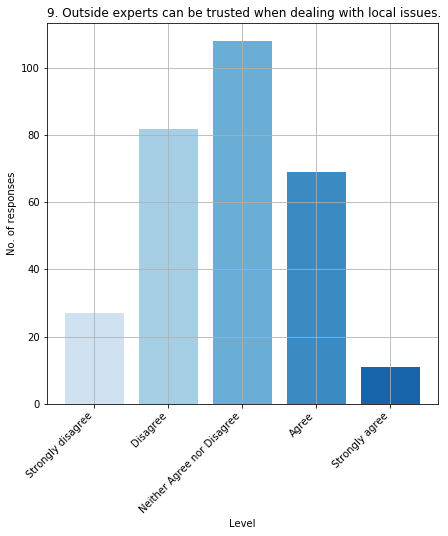

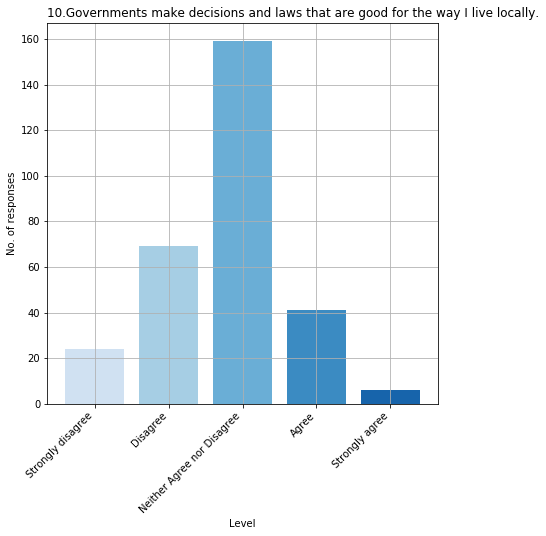

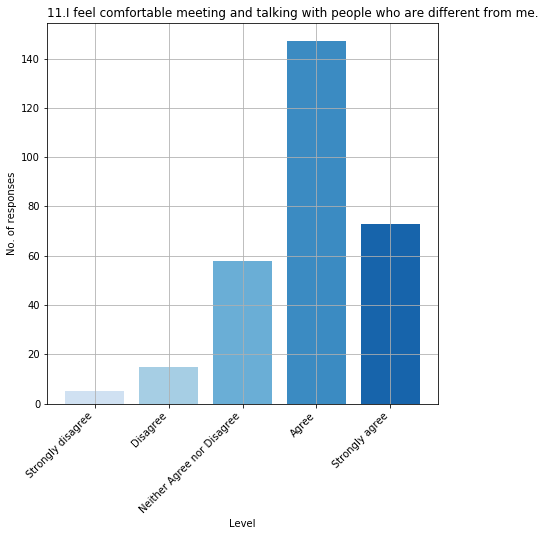

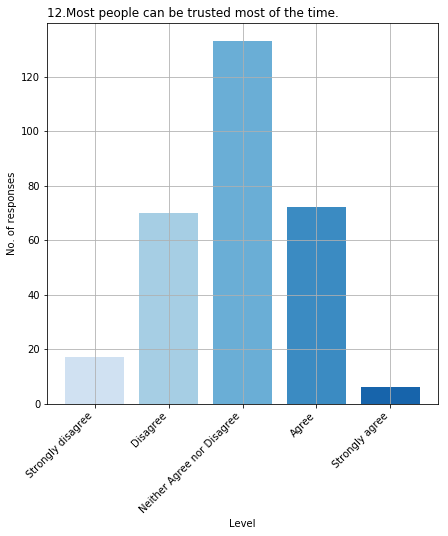

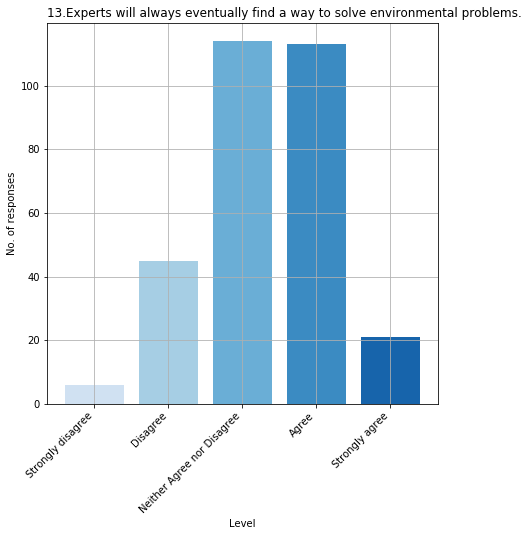

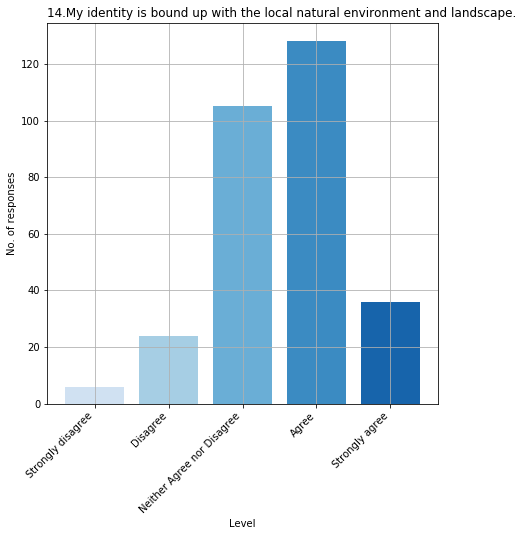

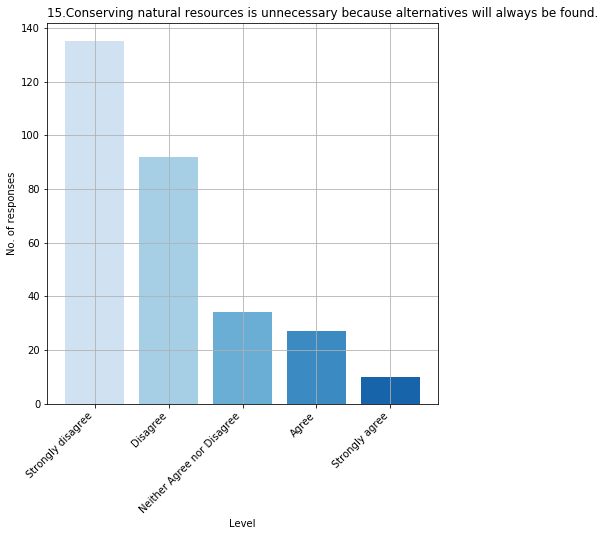

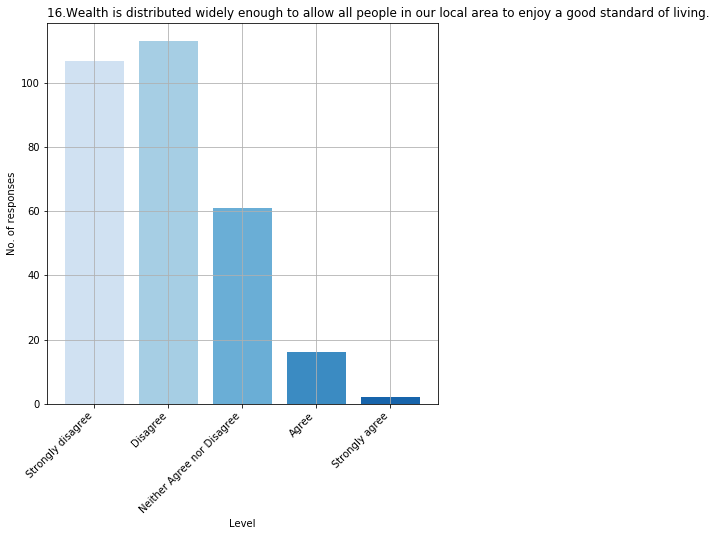

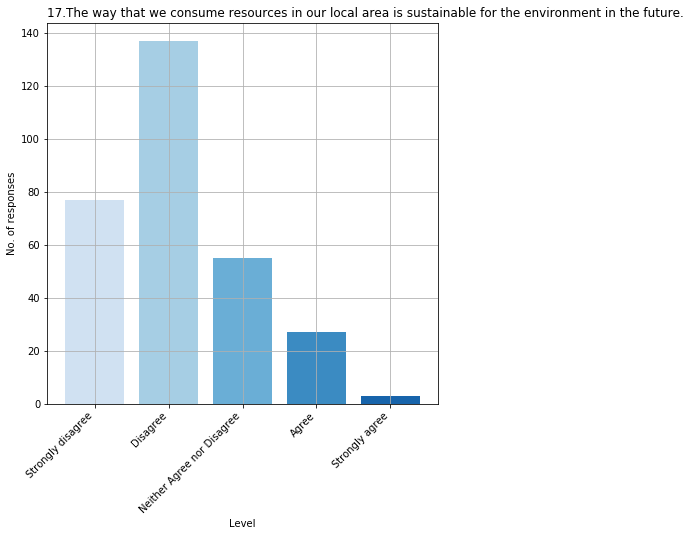

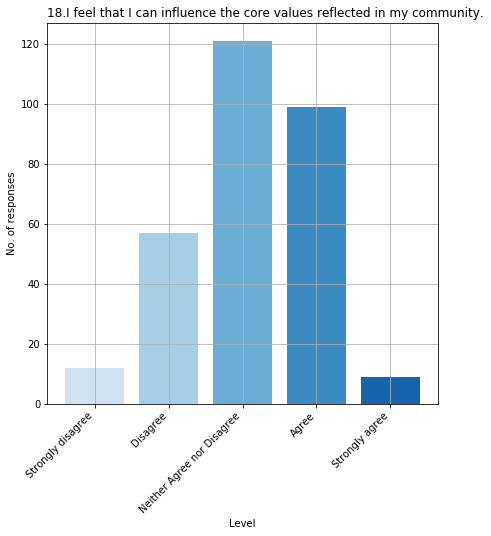

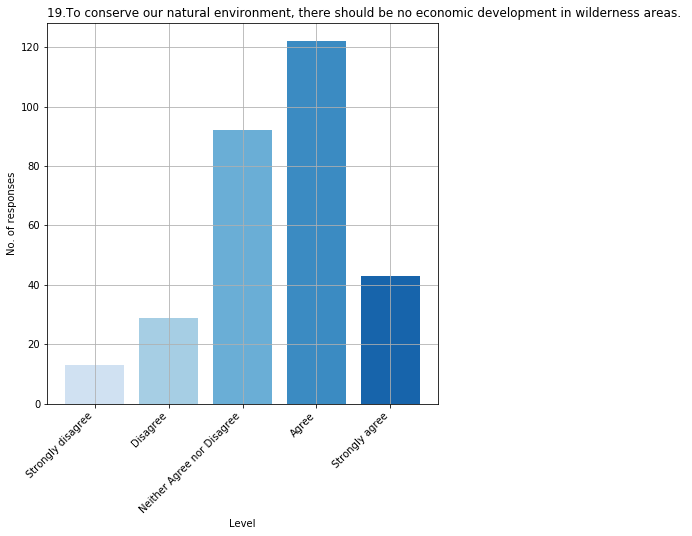

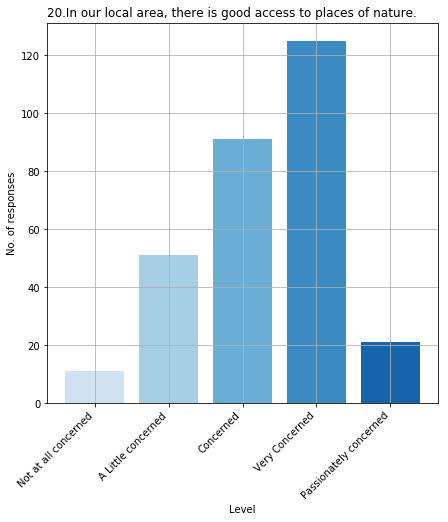

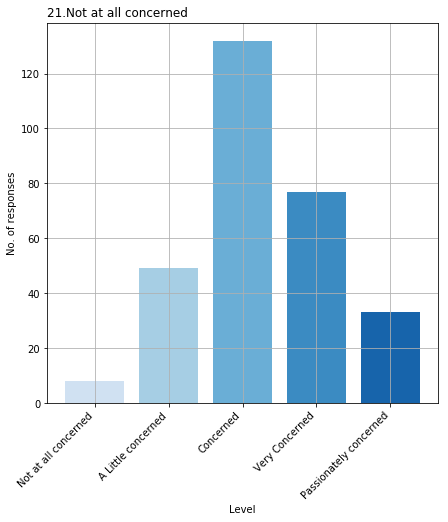

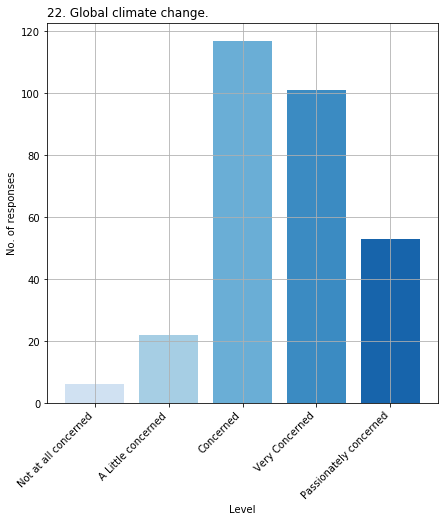

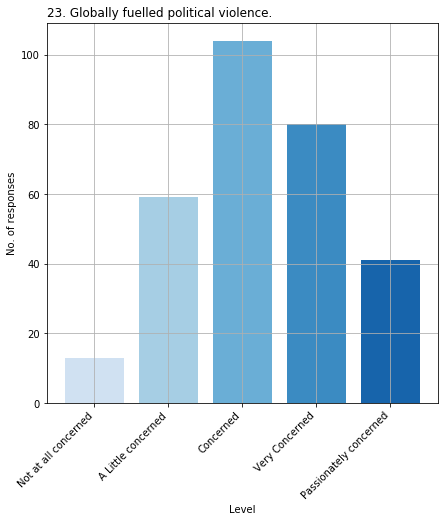

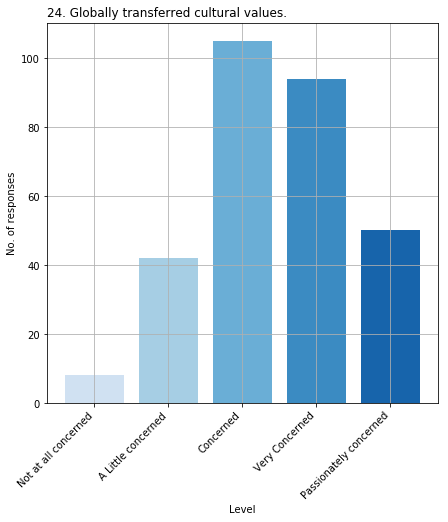

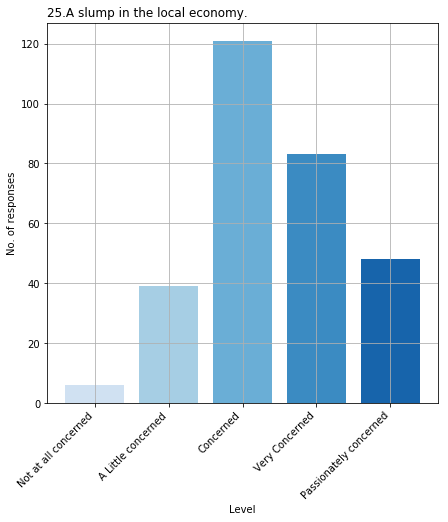

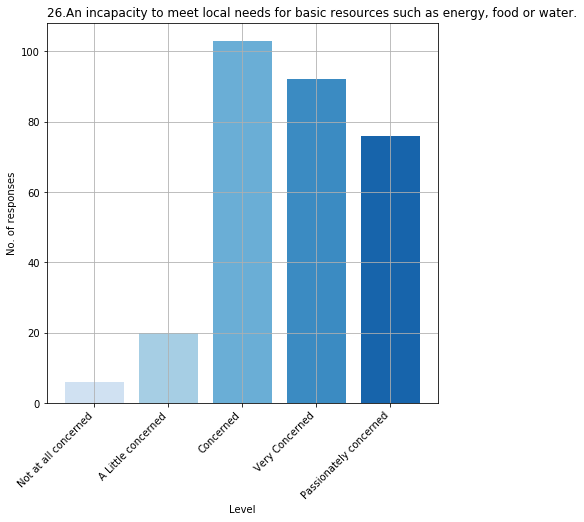

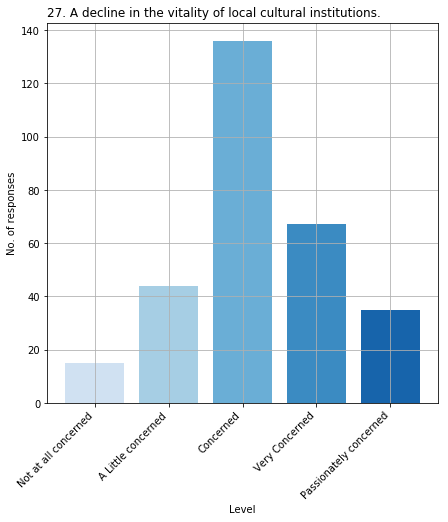

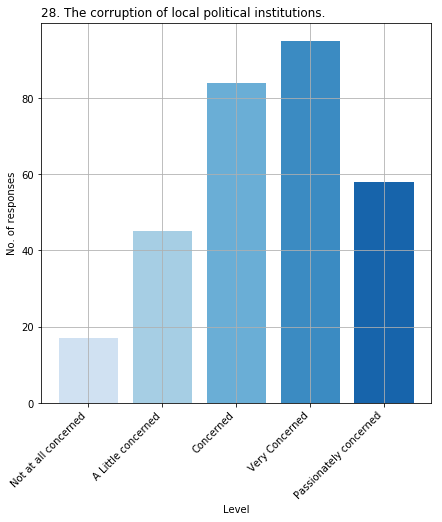

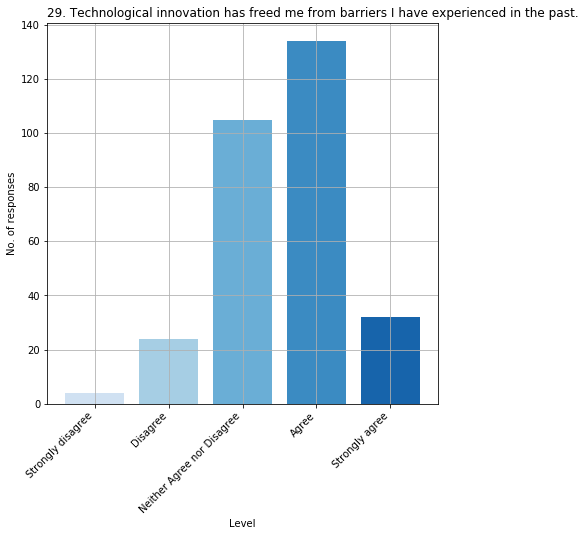

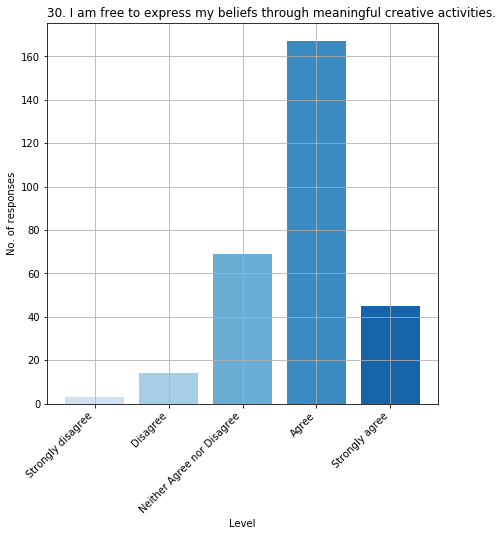

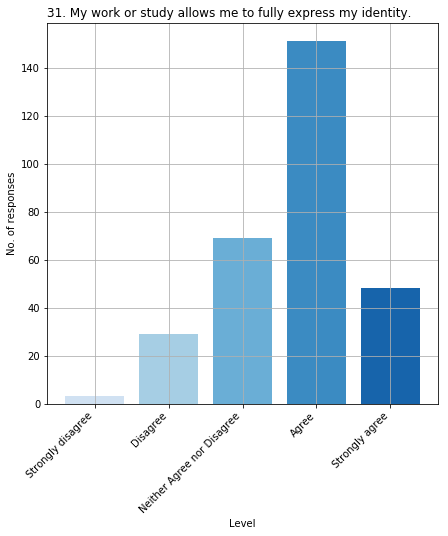

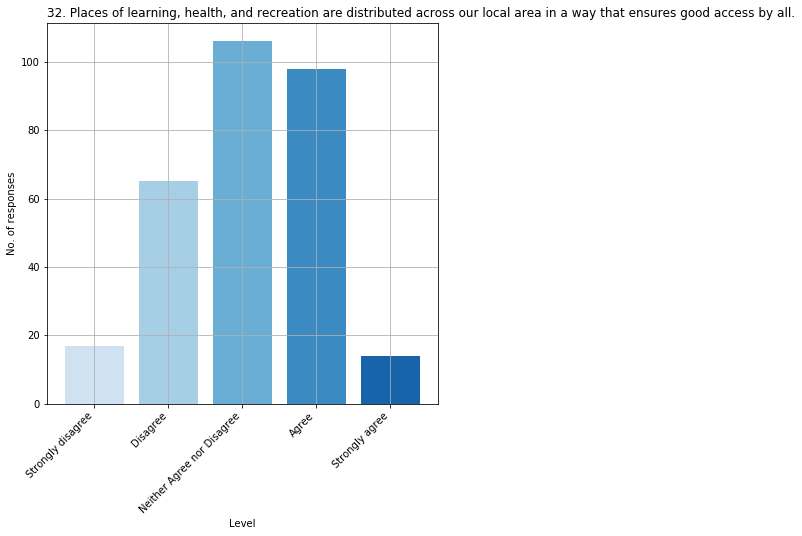

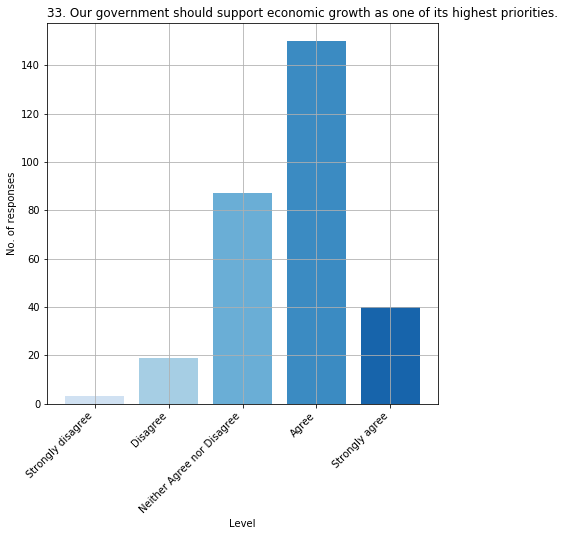

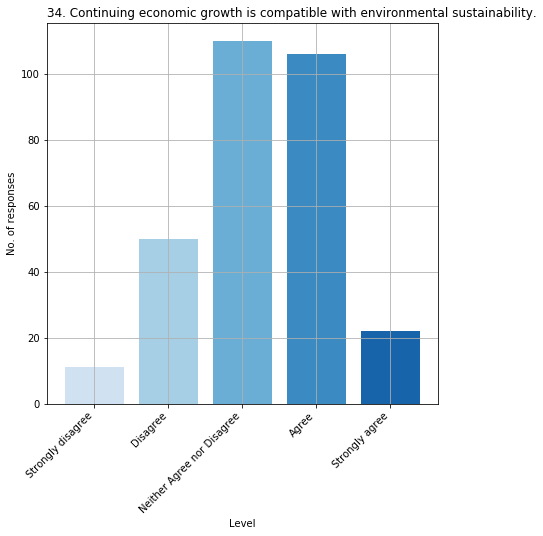

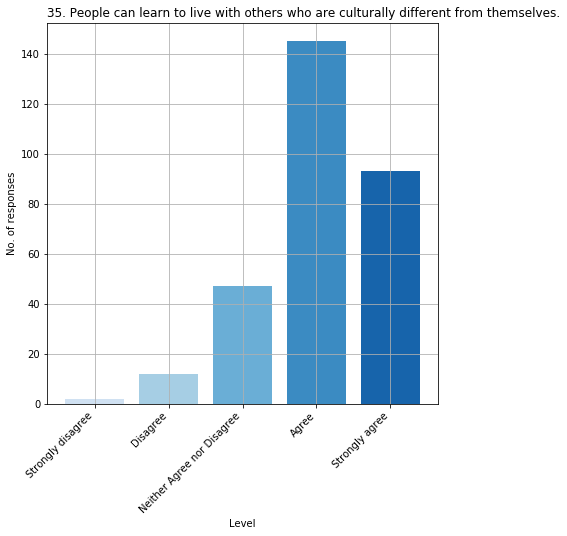

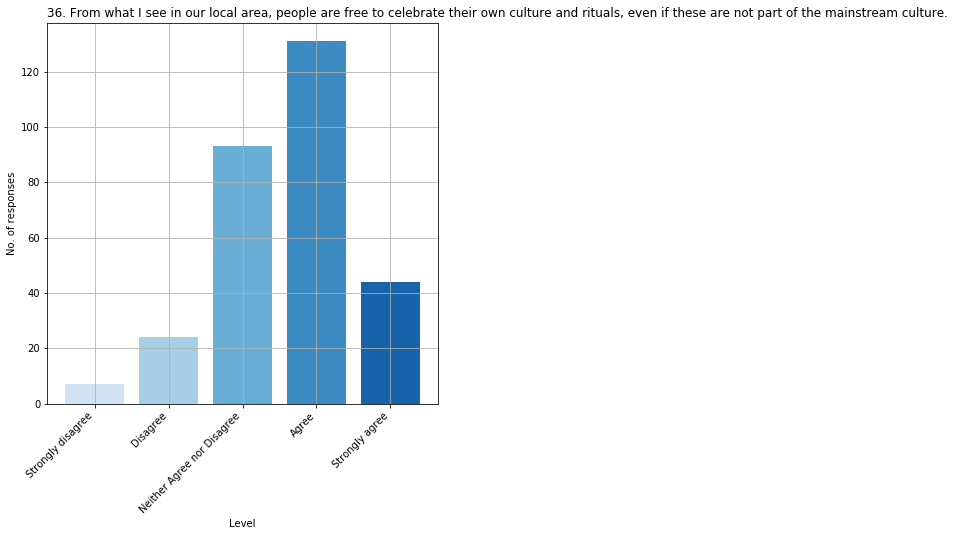

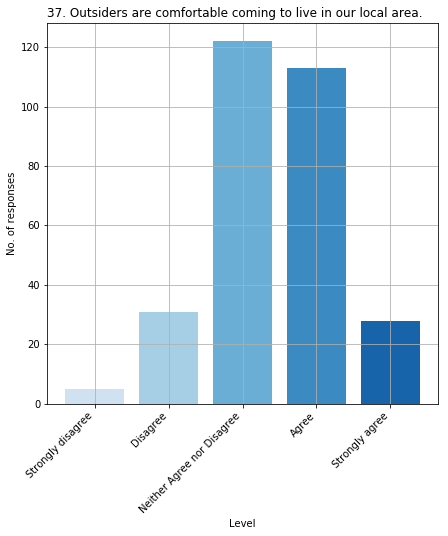

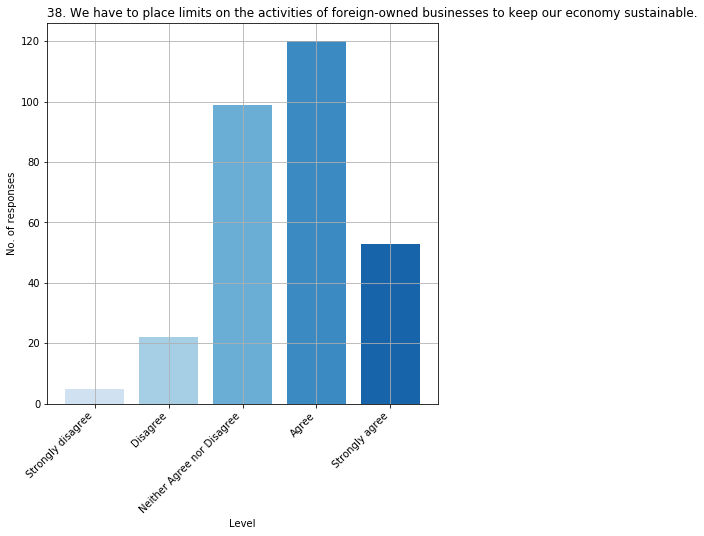

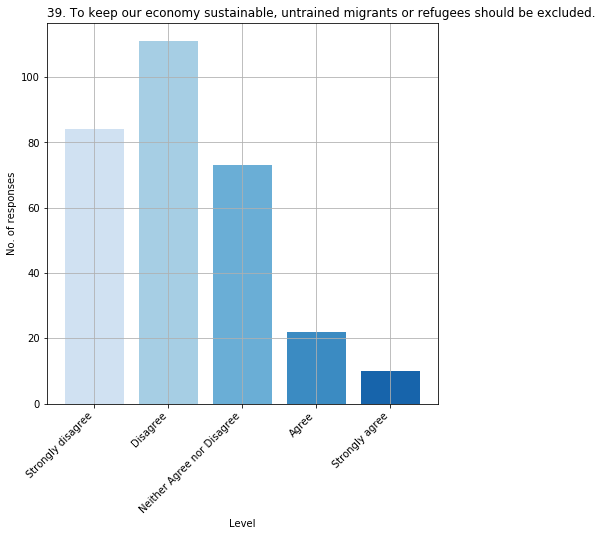

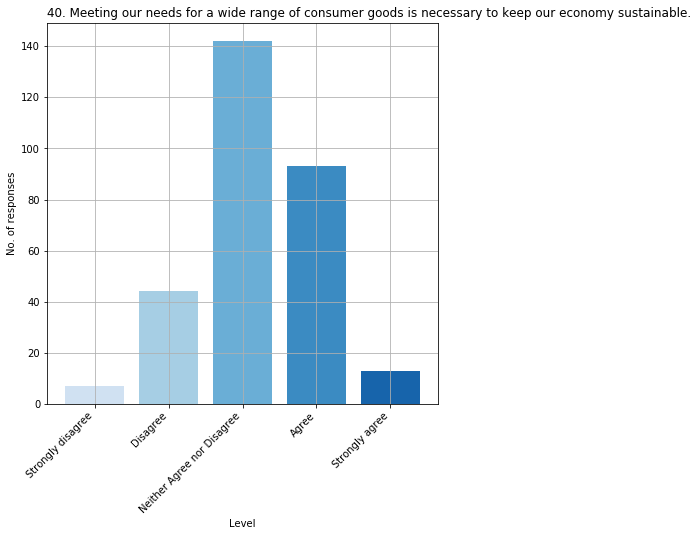

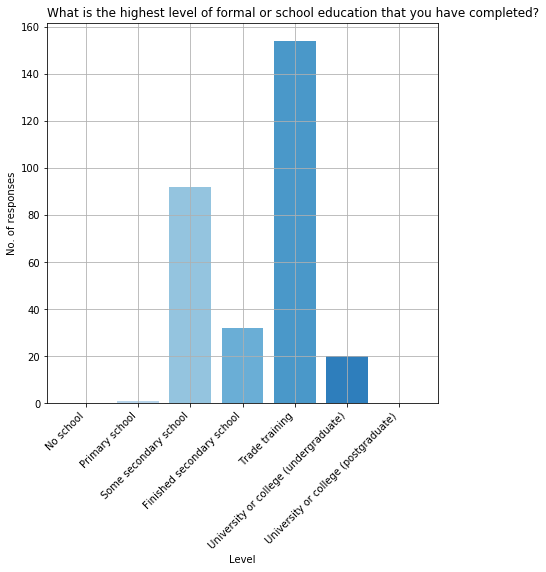

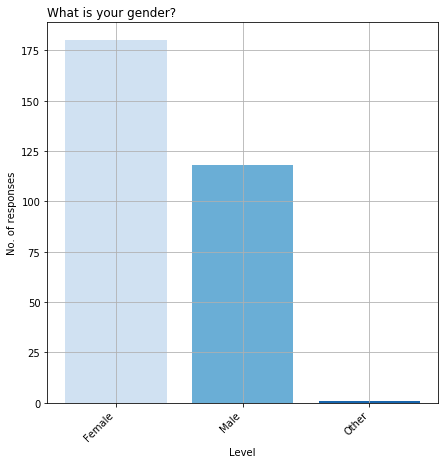

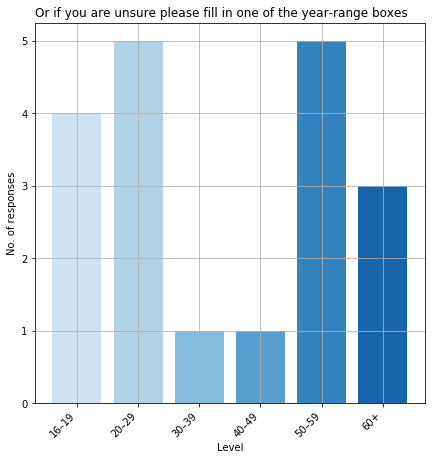

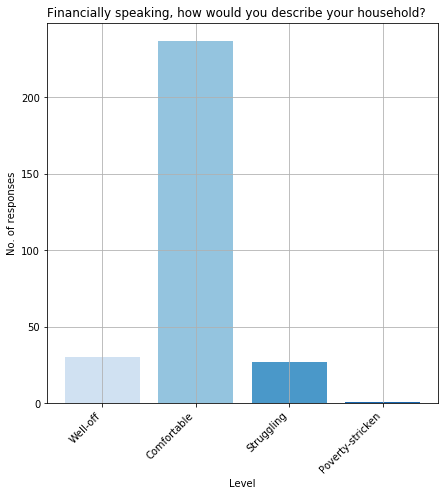

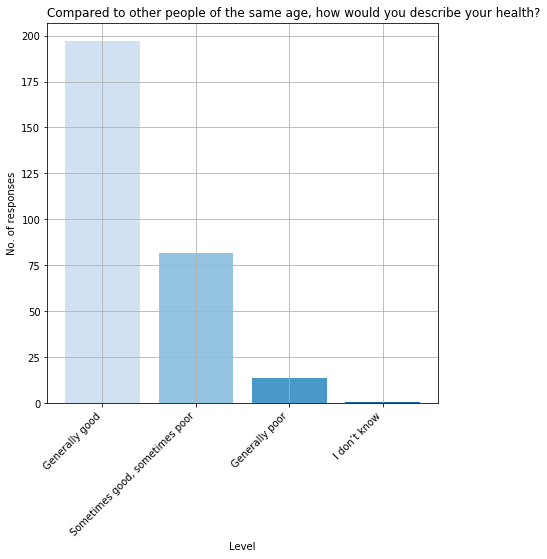

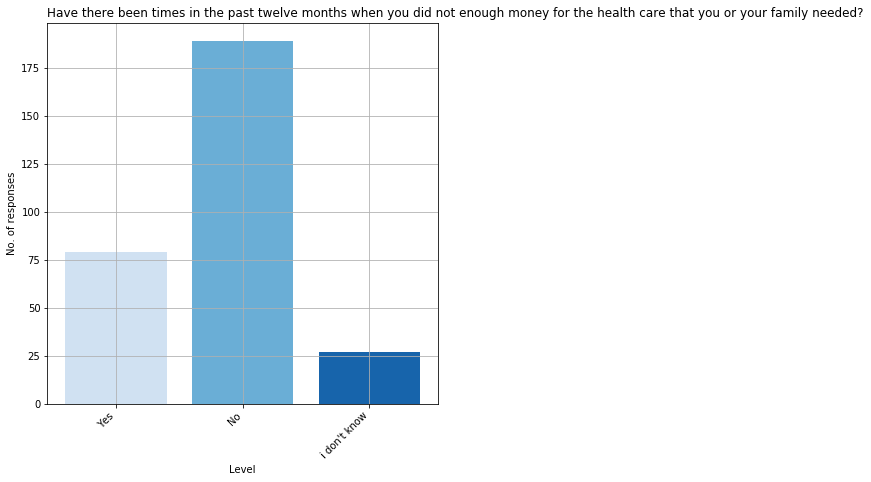

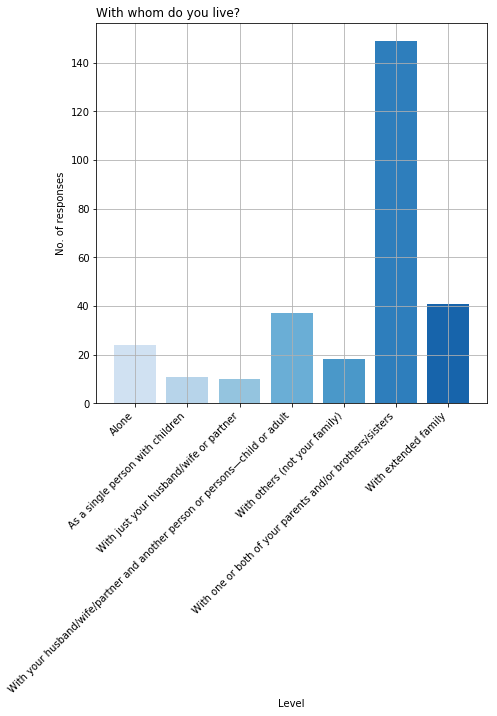

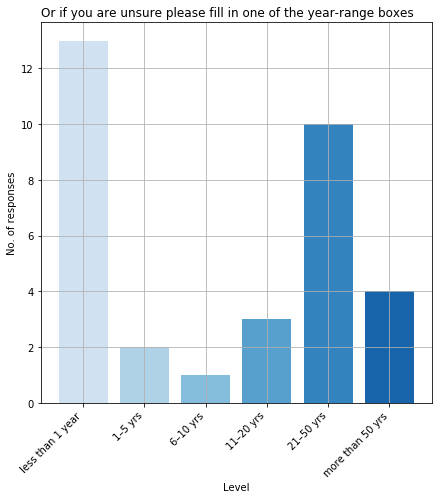

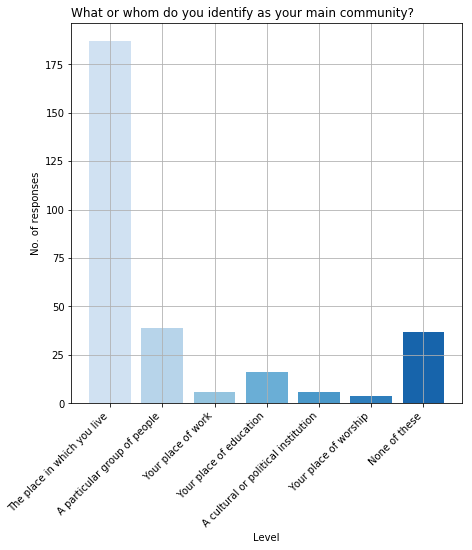

In [284]:
cols_not_to_render = ['Folio', 'Location', 'Soc_2a', 'Soc_8', 'Soc_9a']
cols_to_render = ['An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 'An_14',
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21', 'An_22',
       'An_23a', 'An_23b', 'An_23c', 'Satis_1', 'Satis_2', 'Satis_3',
       'Satis_4', 'Satis_5', 'Satis_6', 'Satis_7', 'Satis_8', 'Satis_9',
       'Satis_10', 'Satis_11', 'Satis_12', 'Satis_13', 'Satis_14', 'Satis_15',
       'Satis_16', 'Satis_17', 'Satis_18', 'Satis_19', 'Satis_20', 'Satis_21',
       'Satis_22', 'Satis_23', 'Satis_24', 'Satis_25', 'Satis_26', 'Satis_27',
       'Satis_28', 'Satis_29', 'Satis_30', 'Satis_31', 'Satis_32', 'Satis_33',
       'Satis_34', 'Satis_35', 'Satis_36', 'Satis_37', 'Satis_38', 'Satis_39',
       'Satis_40', 'Soc_1', 'Soc_3', 'Soc_2b', 'Soc_4', 'Soc_5',
       'Soc_6', 'Soc_7', 'Soc_9b','Soc_10']

[gen_histogram(x) for x in cols_to_render];